In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib notebook
%matplotlib notebook

In [2]:
df_issaquah=pd.read_csv('Issaquah.csv')
df_mercer=pd.read_csv('Mercer_Creek.csv')

In [3]:
area_mercer = 12 #mi^2
area_issaquah = 56.6 #mi^2
area_mercer = area_mercer*2.59*np.power(10,12)      #mm^2
area_issaquah = area_issaquah*2.59*np.power(10,12) #mm^2
df_issaquah['discharge'] = df_issaquah['discharge']*2.832*np.power(10,7) #mm^3/s
df_mercer['discharge'] = df_mercer['discharge']*2.832*np.power(10,7) #mm^3/s
df_issaquah['discharge'] = df_issaquah['discharge']/area_issaquah #mm/s
df_mercer['discharge'] = df_mercer['discharge']/area_mercer #mm/s
df_issaquah['discharge'] = df_issaquah['discharge']*60*60*24 #mm/day
df_mercer['discharge'] = df_mercer['discharge']*60*60*24 #mm/day

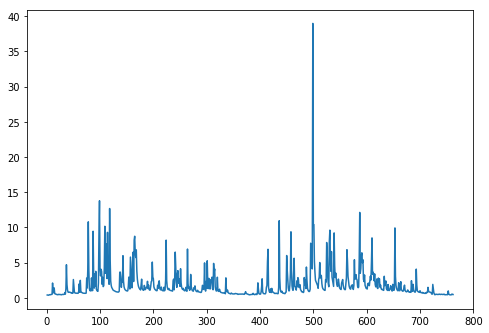

In [4]:
#Solving for Mercer
#We do it for the netire dataset
fig,ax=plt.subplots(figsize=(8,5.5))
ax.plot(df_mercer.day.values,df_mercer.discharge.values)

In [5]:
q1=df_mercer[(df_mercer['day']>=2)&(df_mercer['day']<=762)].discharge.values

In [6]:
q1=np.append(q1,np.nan)

In [7]:
df_mercer=df_mercer.assign(q1=q1)

In [8]:
df_mercer.head()

,Date,day,discharge,q1
0,2009-08-01,1,0.391275,0.393637
1,2009-08-02,2,0.393637,0.363721
2,2009-08-03,3,0.363721,0.373168
3,2009-08-04,4,0.373168,0.426703
4,2009-08-05,5,0.426703,0.444023


In [9]:
df_mercer['dummy']=df_mercer['discharge']-df_mercer['q1']
df_mercer_recession=df_mercer[df_mercer['dummy']>0]

In [10]:
df_mercer.head()

,Date,day,discharge,q1,dummy
0,2009-08-01,1,0.391275,0.393637,-0.002362
1,2009-08-02,2,0.393637,0.363721,0.029916
2,2009-08-03,3,0.363721,0.373168,-0.009447
3,2009-08-04,4,0.373168,0.426703,-0.053535
4,2009-08-05,5,0.426703,0.444023,-0.017320


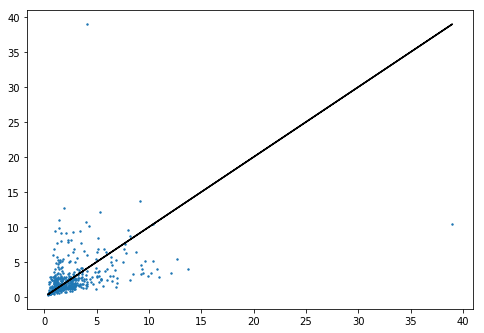

In [11]:
fig,ax=plt.subplots(figsize=(8,5.5))
ax.plot(df_mercer.discharge.values,df_mercer.discharge.values,c='k')
ax.scatter(df_mercer.discharge.values,df_mercer.q1.values,s=2)

<IPython.core.display.Javascript object>


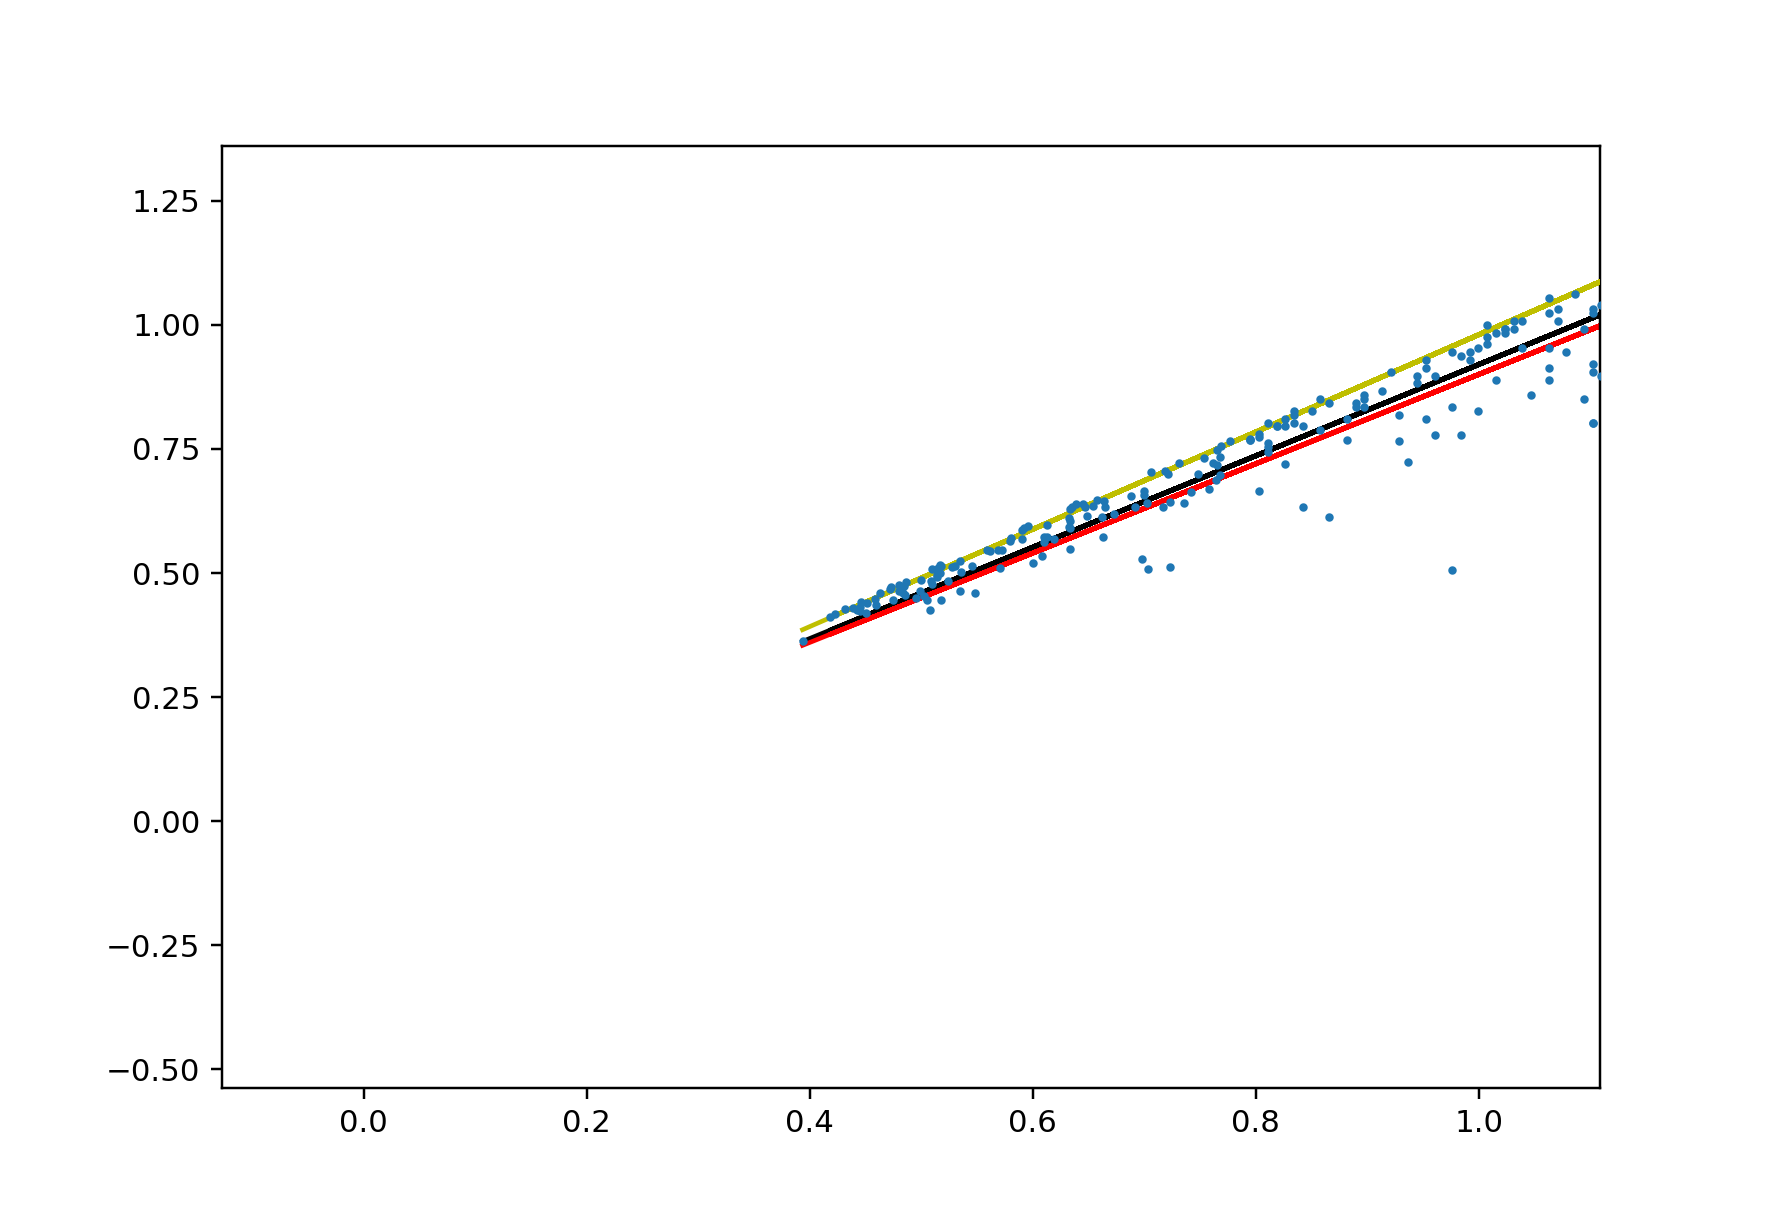

In [44]:
fig,ax=plt.subplots(figsize=(8,5.5))
ax.plot(df_mercer_recession.discharge.values,df_mercer_recession.discharge.values*.92,c='k',zorder=1)
ax.plot(df_mercer_recession.discharge.values,df_mercer_recession.discharge.values*.90,c='r',zorder=2)
ax.plot(df_mercer_recession.discharge.values,df_mercer_recession.discharge.values*.98,c='y',zorder=3)
ax.scatter(df_mercer_recession.discharge.values,df_mercer_recession.q1.values,s=3,zorder=4)

In [13]:
#I fix the kr value as 0.98
kr_mercer=0.98
alpha_mercer=-1*np.log(kr_mercer)
t_star_mercer=1/alpha_mercer

In [14]:
alpha_mercer

0.020202707317519466

In [15]:
t_star_mercer

49.49831645250911

In [16]:
term_2_mercer = np.zeros(np.shape(df_mercer.discharge.values))

In [17]:
q_mercer=df_mercer.discharge.values

In [19]:
dig_fil_mercer=np.zeros(np.shape(q_mercer))
qb_mercer=np.zeros(np.shape(q_mercer))

In [20]:
for i in range(1,len(q_mercer)):
    term_2_mercer[i]=0.5*(1-kr_mercer)*(q_mercer[i]+q_mercer[i-1])

In [21]:
dig_fil_mercer[0]=q_mercer[0]
for i in range(0,len(q_mercer)):
    if dig_fil_mercer[i]>q_mercer[i]:
        qb_mercer[i]=q_mercer[i]
    else:
        qb_mercer[i]=dig_fil_mercer[i]
    if i<=(len(q_mercer)-2):
        dig_fil_mercer[i+1]=term_2_mercer[i+1]+kr_mercer*qb_mercer[i]
        
    #else:
        #continue
        
        

In [23]:
df_mercer=df_mercer.assign(term_2=term_2_mercer)
df_mercer=df_mercer.assign(dig_fil=dig_fil_mercer)
df_mercer=df_mercer.assign(qb=qb_mercer)

In [24]:
df_mercer.head()

,Date,day,discharge,q1,dummy,term_2,dig_fil,qb
0,2009-08-01,1,0.391275,0.393637,-0.002362,0.000000,0.391275,0.391275
1,2009-08-02,2,0.393637,0.363721,0.029916,0.007849,0.391299,0.391299
2,2009-08-03,3,0.363721,0.373168,-0.009447,0.007574,0.391046,0.363721
3,2009-08-04,4,0.373168,0.426703,-0.053535,0.007369,0.363815,0.363815
4,2009-08-05,5,0.426703,0.444023,-0.017320,0.007999,0.364538,0.364538


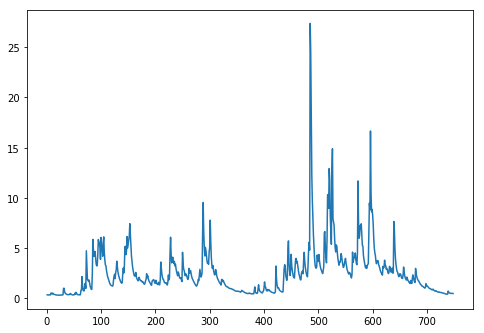

In [25]:
#Solving it for issaquah
fig,ax=plt.subplots(figsize=(8,5.5))
ax.plot(df_issaquah.day.values,df_issaquah.discharge.values)

In [27]:
q1_issaquah=df_issaquah[(df_issaquah['day']>=2)&(df_issaquah['day']<=762)].discharge.values

In [28]:
q1_issaquah=np.append(q1_issaquah,np.nan)
df_issaquah=df_issaquah.assign(q1=q1_issaquah)

In [29]:
df_issaquah['dummy']=df_issaquah['discharge']-df_issaquah['q1']
df_issaquah_recession=df_issaquah[df_issaquah['dummy']>0]

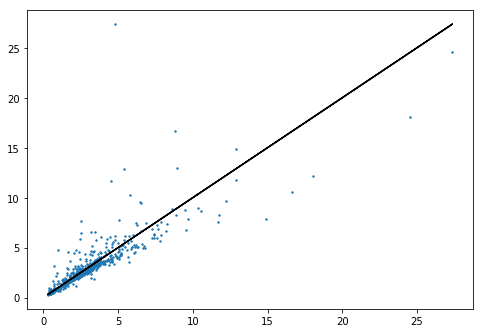

In [30]:
fig,ax=plt.subplots(figsize=(8,5.5))
ax.plot(df_issaquah.discharge.values,df_issaquah.discharge,c='k')
ax.scatter(df_issaquah.discharge.values,df_issaquah.q1.values,s=2)

<IPython.core.display.Javascript object>


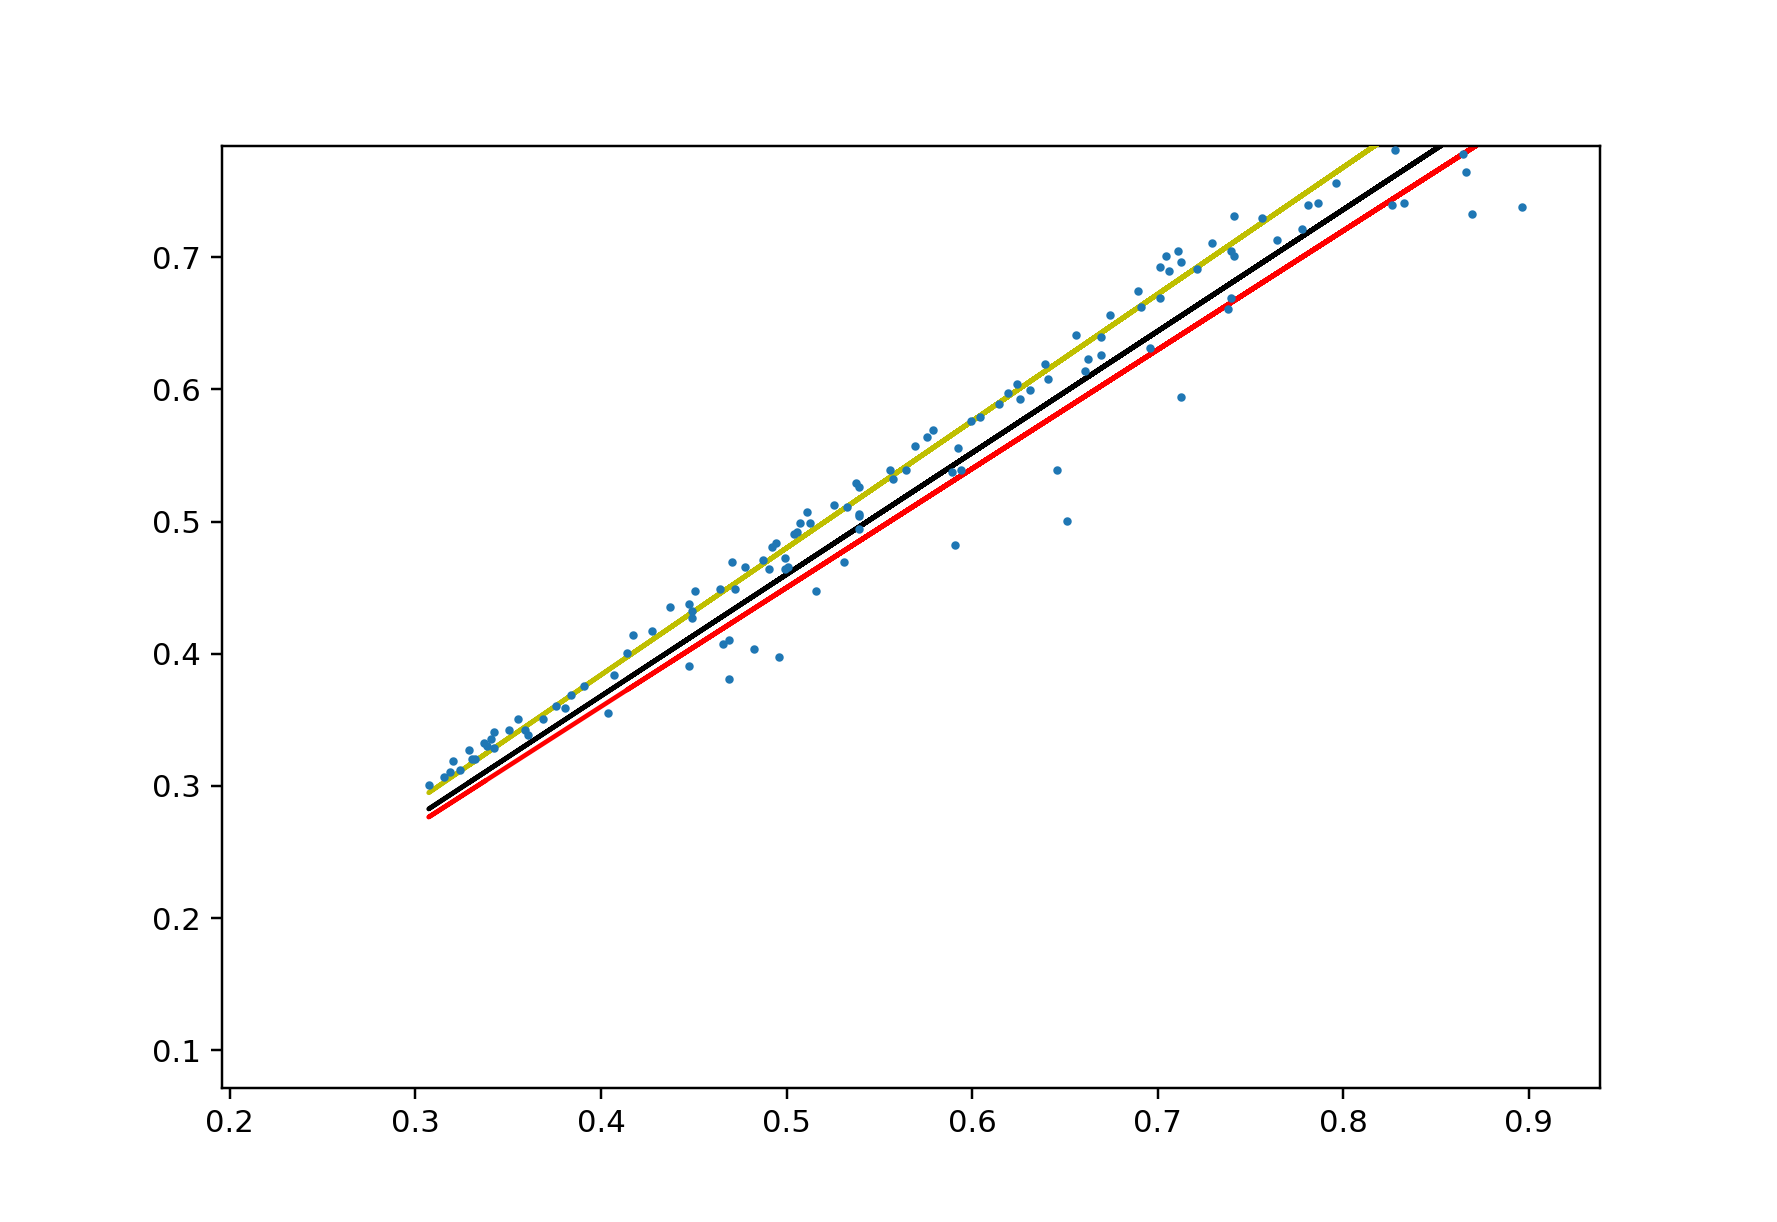

In [34]:
fig,ax=plt.subplots(figsize=(8,5.5))
ax.plot(df_issaquah_recession.discharge.values,df_issaquah_recession.discharge.values*.92,c='k',zorder=1)
ax.plot(df_issaquah_recession.discharge.values,df_issaquah_recession.discharge.values*.90,c='r',zorder=2)
ax.plot(df_issaquah_recession.discharge.values,df_issaquah_recession.discharge.values*.96,c='y',zorder=3)
ax.scatter(df_issaquah_recession.discharge.values,df_issaquah_recession.q1.values,s=3,zorder=4)

In [35]:
#I fix value of kr_issaquah as 0.96

In [36]:
kr_issaquah=0.96
alpha_issaquah=-np.log(kr_issaquah)
t_star_issaquah=1/alpha_issaquah

In [37]:
kr_issaquah

0.96

In [38]:
alpha_issaquah

0.040821994520255166

In [39]:
t_star_issaquah

24.49659826160178

In [40]:
q_issaquah=df_issaquah.discharge.values
term_2_issaquah=np.zeros(np.shape(q_issaquah))
dig_fil_issaquah=np.zeros(np.shape(q_issaquah))
qb_issaquah=np.zeros(np.shape(q_issaquah))
for i in range(1,len(q_issaquah)):
    term_2_issaquah[i]=0.5*(1-kr_issaquah)*(q_issaquah[i]+q_issaquah[i-1])
dig_fil_issaquah[0]=q_issaquah[0]
for i in range(0,len(q_issaquah)):
    if dig_fil_issaquah[i]>q_issaquah[i]:
        qb_issaquah[i]=q_issaquah[i]
    else:
        qb_issaquah[i]=dig_fil_issaquah[i]
    if i<=(len(q_issaquah)-2):
        dig_fil_issaquah[i+1]=term_2_issaquah[i+1]+kr_issaquah*qb_issaquah[i]

In [42]:
df_issaquah=df_issaquah.assign(term_2=term_2_issaquah,dig_fil=dig_fil_issaquah,qb=qb_issaquah)

In [43]:
df_issaquah.head()

,Time,day,discharge,q1,dummy,term_2,dig_fil,qb
0,2009-08-01,1,0.337165,0.332157,0.005007,0.000000,0.337165,0.337165
1,2009-08-02,2,0.332157,0.320473,0.011684,0.013386,0.337065,0.332157
2,2009-08-04,3,0.320473,0.320473,0.000000,0.013053,0.331924,0.320473
3,2009-08-05,4,0.320473,0.337165,-0.016691,0.012819,0.320473,0.320473
4,2009-08-06,5,0.337165,0.338834,-0.001669,0.013153,0.320807,0.320807


In [45]:
bfi_mercer=np.sum(df_mercer.qb.values)/np.sum(df_mercer.discharge.values)
bfi_mercer

0.5177510285395616

In [46]:
bfi_issaquah=np.sum(df_issaquah.qb.values)/np.sum(df_issaquah.discharge.values)
bfi_issaquah

0.680434388137451

<IPython.core.display.Javascript object>


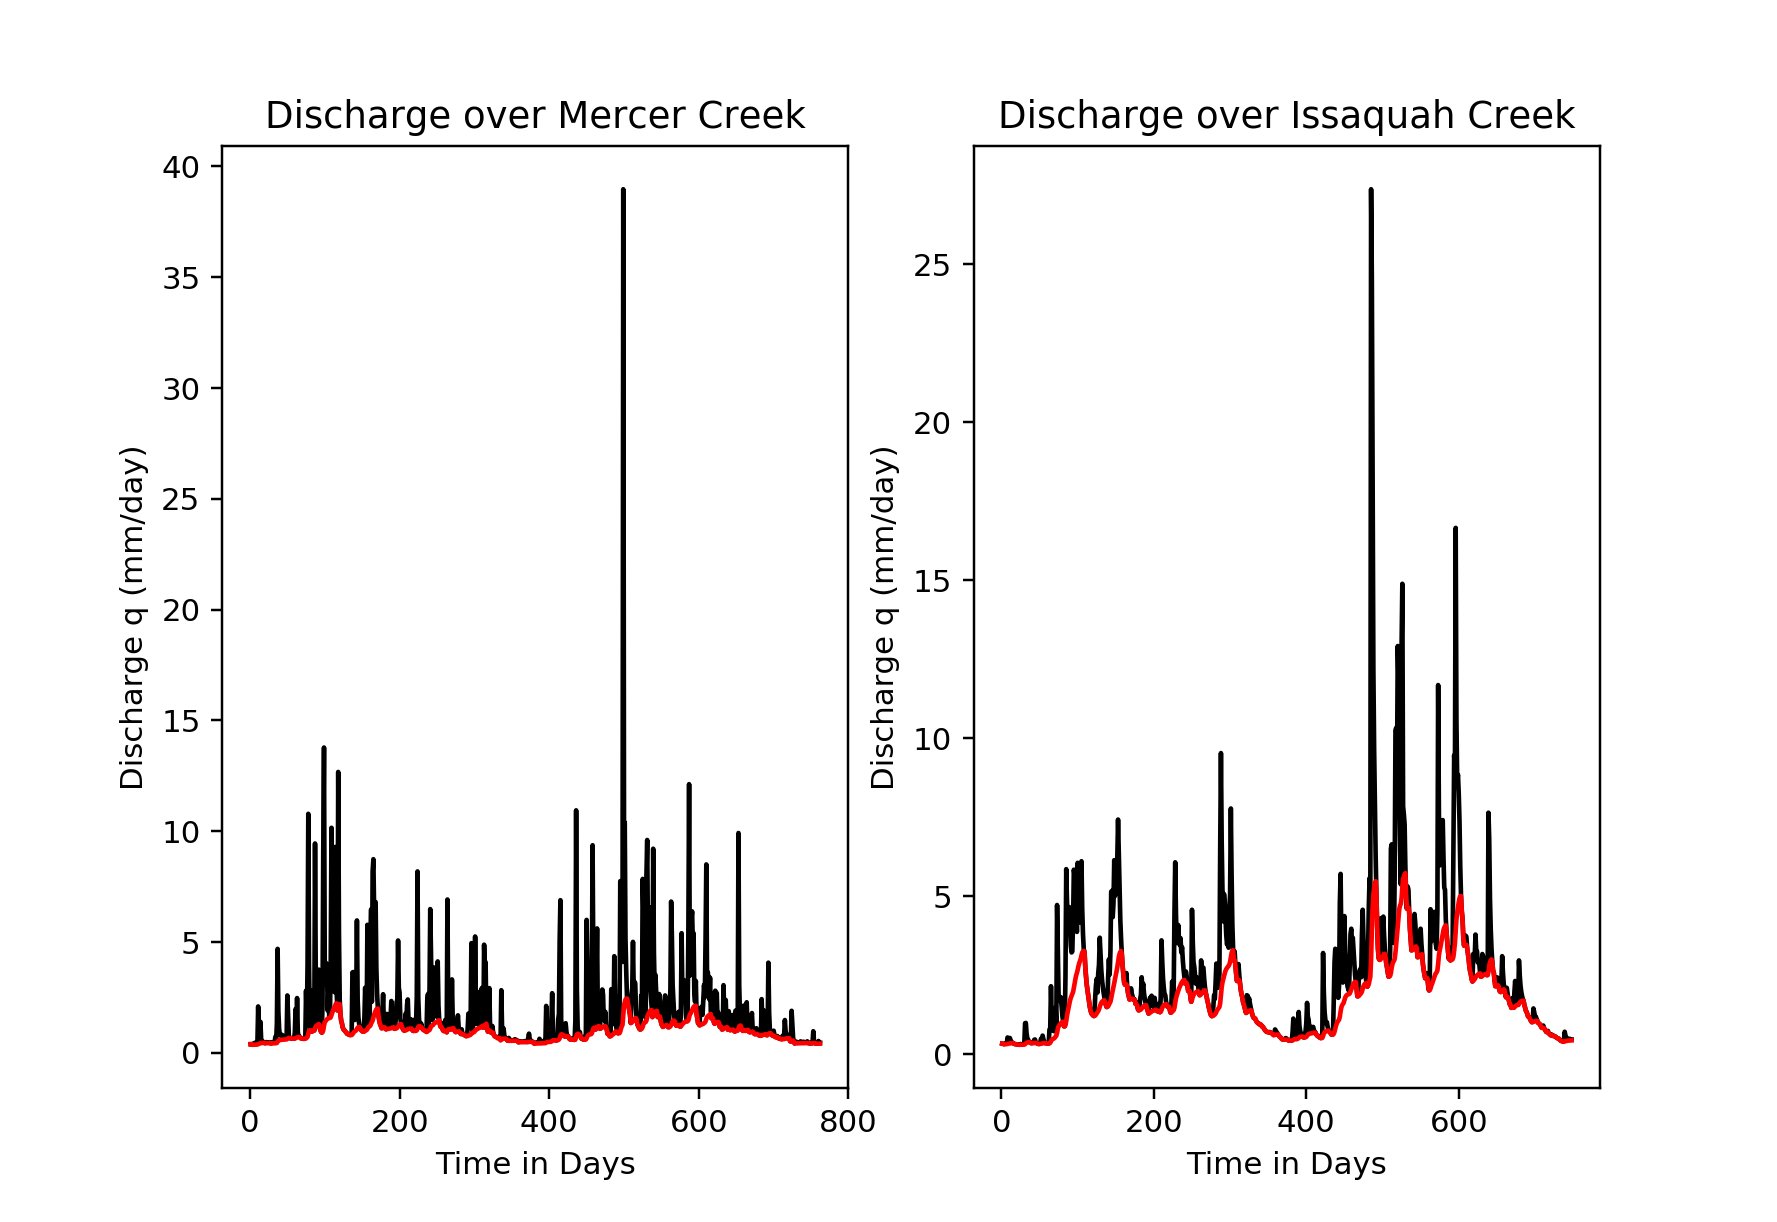

In [49]:
fig,ax=plt.subplots(1,2,figsize=(8,5.5))
ax[0].plot(df_mercer.day.values,df_mercer.discharge.values,c='k',zorder=1)
ax[0].plot(df_mercer.day.values,df_mercer.qb.values,c='r',zorder=2)
ax[0].set_xlabel('Time in Days')
ax[0].set_ylabel('Discharge q (mm/day)')
ax[0].set_title('Discharge over Mercer Creek')
ax[1].plot(df_issaquah.day.values,df_issaquah.discharge.values,c='k',zorder=1)
ax[1].plot(df_issaquah.day.values,df_issaquah.qb.values,c='r',zorder=2)
ax[1].set_xlabel('Time in Days')
ax[1].set_ylabel('Discharge q (mm/day)')
ax[1].set_title('Discharge over Issaquah Creek')
fig.savefig('Baseflow_Seperation.png',dpi=300,format='png')